# AML Coursework Assessment

Machine Learning Project: UCI Adult Census Dataset

## Introduction
In this project, we will investigate the UCI Adult Census Dataset, which contains demographic information about individuals. The primary goal is to predict whether an individual's income exceeds $50,000 per year.

## Importing Libraries
Import the necessary libraries for data manipulation and analysis.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
%matplotlib inline

## Load the Dataset

Load the dataset from the UCI Machine Learning Repository.

In [44]:
# Define the URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Define the column names
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Load the dataset
df = pd.read_csv(url, names=columns, na_values=' ?', sep=',\s', engine='python')

# Display the first few rows of the dataset
df.head()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Saeed\AppData\Local\Temp\ipykernel_15296\1223881124.py:9: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, names=columns, na_values=' ?', sep=',\s', engine='python')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Dataset Overview

Explore the dataset to understand its structure and contents.

In [45]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Handle Missing Values

Check for missing values in the dataset and handle them appropriately.

In [46]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values (e.g., drop or impute)
df.dropna(inplace=True)

# Verify that missing values are handled
df.isnull().sum()

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Encode Categorical Variables

Convert categorical variables into numerical format using label encoding.

In [47]:
# List of categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country', 'income']

# Initialize LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the first few rows to verify encoding
print("Table head after encoding:")
df.head()

Table head after encoding:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


## Standardise the Data

Standardise the numerical features, this will particularly be required for SVM and K-Means candidate algorithms later.

In [48]:
# List of numerical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows to verify scaling
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


## Split the Data into Features and Target Variable

Separate the features from the target variable.

In [49]:
# Features (excluding the target variable 'income' and 'fnlwgt')
X = df.drop(['income', 'fnlwgt'], axis=1)

# Target variable
y = df['income']

# Display the shapes of X and y to verify
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (32561, 13)
Target shape: (32561,)


## Apply Feature Selection Techniques

1. Filter Method: Using Mutual Information

In [50]:
def init_mutual_info(X, y, feature_num):
    # Calculate mutual information
    mutual_info = mutual_info_classif(X, y)

    # Create a series with feature names and their mutual information scores
    mutual_info_series = pd.Series(mutual_info, index=X.columns)

    # Sort the series in descending order
    mutual_info_series = mutual_info_series.sort_values(ascending=False)

    # Plot the mutual information scores
    plt.figure(figsize=(12, 6))
    sns.barplot(x=mutual_info_series.values, y=mutual_info_series.index)
    plt.title('Mutual Information Scores')
    plt.xlabel('Mutual Information')
    plt.ylabel('Features')
    plt.show()

    # Select top features based on mutual information
    mutual_info_features = mutual_info_series.index[:feature_num]
    print("Top features based on mutual information:\n", mutual_info_features)
    return mutual_info_features

2. Wrapper Method: Using Recursive Feature Elimination (RFE) with a Decision Tree Classifier

In [51]:
def init_decision_tree_classifier(X, y, feature_num):
    # Initialize a Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier()

    # Initialize RFE with the classifier and number of features to select
    rfe = RFE(estimator=dt_classifier, n_features_to_select=feature_num)

    # Fit RFE
    rfe.fit(X, y)

    # Get the support and ranking of the features
    rfe_support = rfe.support_
    rfe_ranking = rfe.ranking_

    # Create a series with feature names and their RFE rankings
    rfe_ranking_series = pd.Series(rfe_ranking, index=X.columns)

    # Get the top features based on RFE
    rfe_top_features = rfe_ranking_series[rfe_ranking_series == 1].index
    print("Top features based on RFE:\n", rfe_top_features)
    return rfe_top_features

3. Considering Feature Importance Using Feature Importance from a Random Forest Classifier

In [52]:
def init_random_forest_classifier(X, y, feature_num):
    # Fit the classifier to the data (using gini)
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X, y)

    # Get feature importances
    feature_importances = rf_classifier.feature_importances_
    feature_importance_series = pd.Series(feature_importances, index=X.columns)
    feature_importance_series = feature_importance_series.sort_values(ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance_series.values, y=feature_importance_series.index)
    plt.title('Random Forest Classifier')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

    # Select top features
    top_features_rf = feature_importance_series.index[:feature_num]
    print("Top features based on feature importance of Random Forest Classifier:\n", top_features_rf)
    return top_features_rf

Feature Selection based on aggregating 3 techniques

In [53]:
def init_feature_selection(X, y, feature_num):
    # Initiate feature selection
    mutual_info_features = init_mutual_info(X, y, feature_num)
    rfe_top_features = init_decision_tree_classifier(X, y, feature_num)
    top_features_rf = init_random_forest_classifier(X, y, feature_num)
    mutual_info_features = mutual_info_features.tolist()
    rfe_features = rfe_top_features.tolist()
    random_forest_features = top_features_rf.tolist()

    # Identify and combine core and extended features
    all_features = mutual_info_features + rfe_features + random_forest_features
    feature_counts = pd.Series(all_features).value_counts()
    core_features = feature_counts[feature_counts >= 2].index.tolist()
    extended_features = feature_counts[feature_counts == 1].index.tolist()
    selected_features = core_features + extended_features

    # Ensure the number of selected features is = feature_num
    if len(selected_features) > feature_num:
        selected_features = selected_features[:feature_num]
    elif len(selected_features) < feature_num:
        additional_features_needed = feature_num - len(selected_features)
        # Add more features from the extended features list if needed
        additional_features = extended_features[:additional_features_needed]
        selected_features += additional_features

    X_final = X[selected_features]
    print("Final Selected Features for Candidate Algorithms:", selected_features)
    return X_final

## PCA for Dimensionality Reduction

In [54]:
# X_pca = apply_pca(X_final, n_components=3)

def apply_pca(X, n_components):
    if n_components > X.shape[1]:
        n_components = X.shape[1]
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Plotting explained variance
    plt.figure(figsize=(12, 6))
    sns.barplot(x=[f"PC{i+1}" for i in range(n_components)], y=pca.explained_variance_ratio_)
    plt.title('Explained Variance Ratio by Principal Component')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.show()
    
    return X_pca, n_components

## Evaluate Model

In [55]:
def evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv=5):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    return accuracy, report, grid_search.best_params_

## Implement Workflow

Workflow function that provides for variables and hyperparameters to run feature selection, dimensionality reduction, and candidate algorithms. It aims for a comprehensive computation of variables to identify the optimal configuration for each algorithm. The results are collectively exported to the project directory in ‘results.csv’.

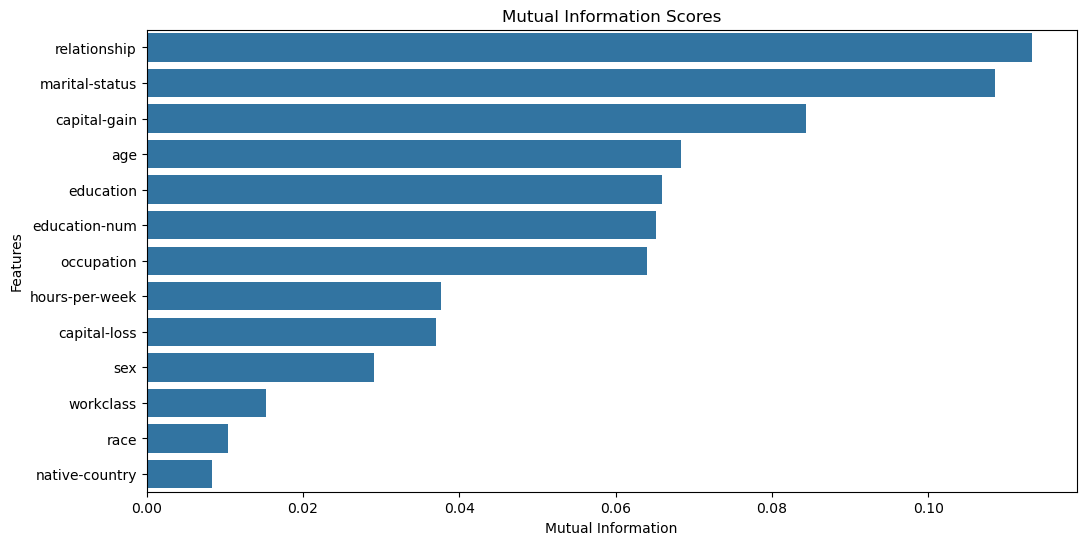

Top features based on mutual information:
 Index(['relationship', 'marital-status', 'capital-gain'], dtype='object')
Top features based on RFE:
 Index(['education-num', 'relationship', 'capital-gain'], dtype='object')


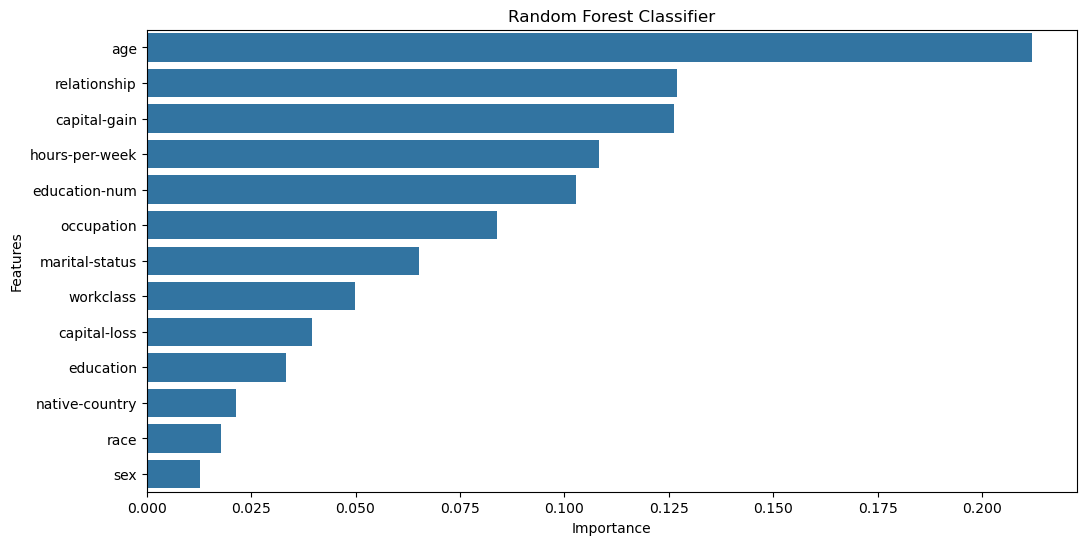

Top features based on feature importance of Random Forest Classifier:
 Index(['age', 'relationship', 'capital-gain'], dtype='object')
Final Selected Features for Candidate Algorithms: ['relationship', 'capital-gain', 'marital-status']


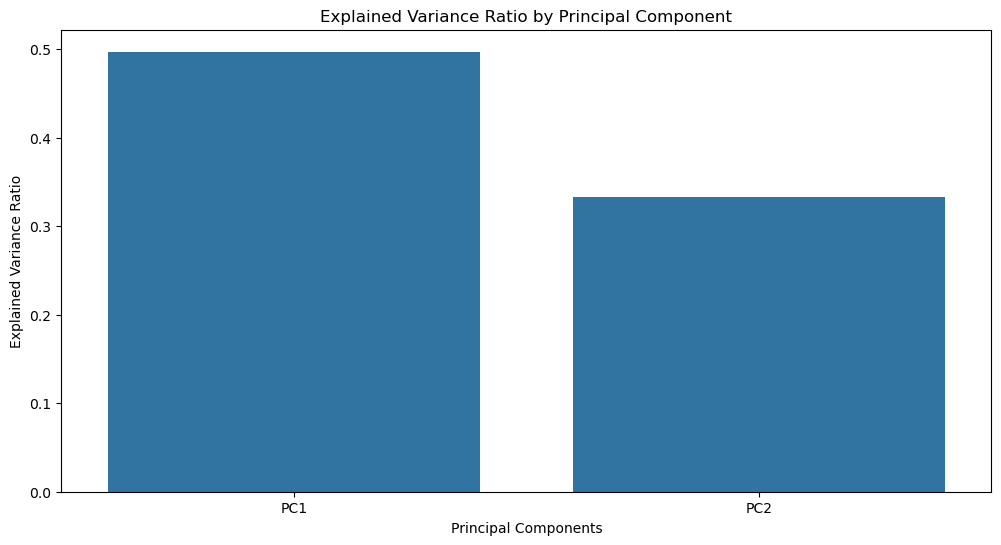

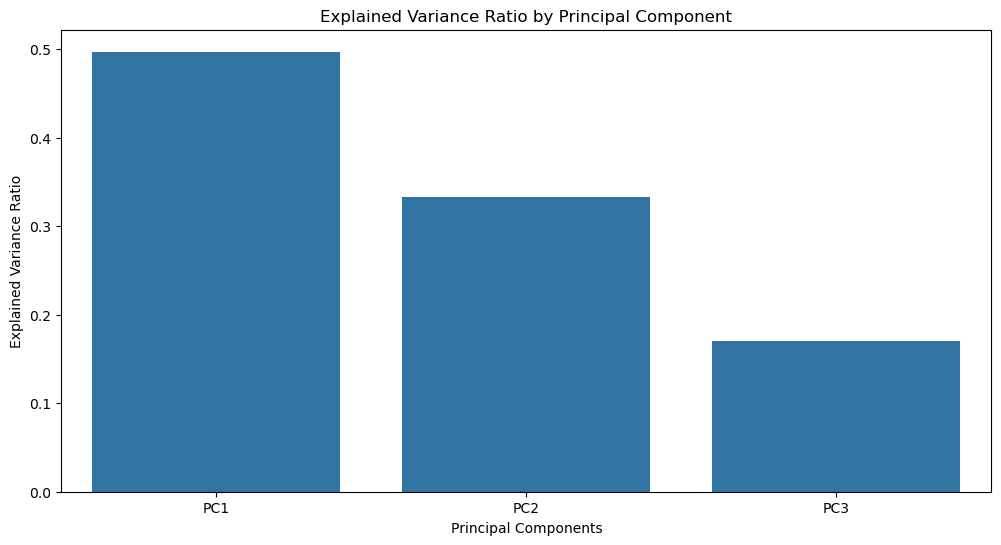

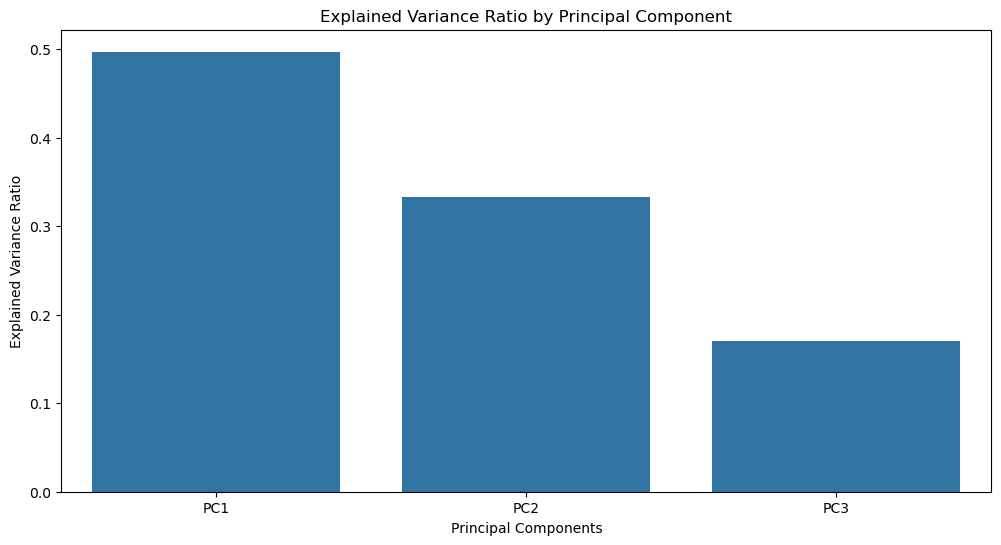

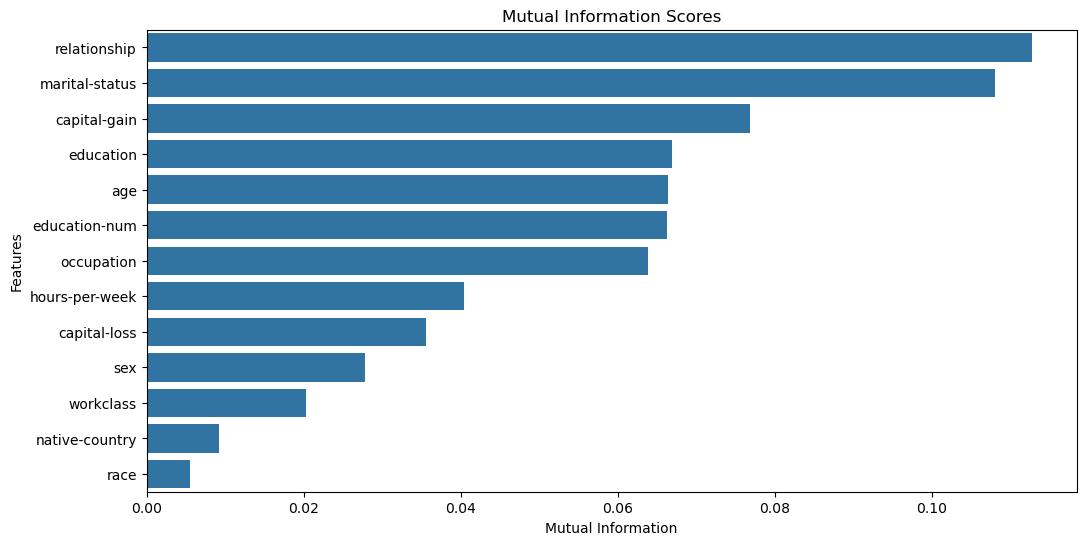

Top features based on mutual information:
 Index(['relationship', 'marital-status', 'capital-gain', 'education', 'age',
       'education-num', 'occupation'],
      dtype='object')
Top features based on RFE:
 Index(['age', 'workclass', 'education-num', 'occupation', 'relationship',
       'capital-gain', 'hours-per-week'],
      dtype='object')


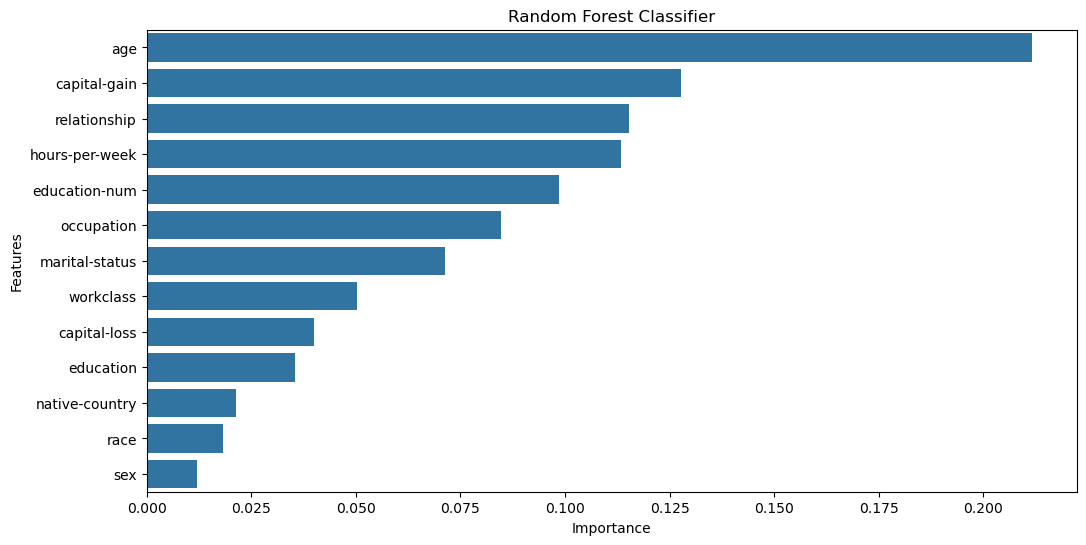

Top features based on feature importance of Random Forest Classifier:
 Index(['age', 'capital-gain', 'relationship', 'hours-per-week',
       'education-num', 'occupation', 'marital-status'],
      dtype='object')
Final Selected Features for Candidate Algorithms: ['relationship', 'capital-gain', 'age', 'education-num', 'occupation', 'marital-status', 'hours-per-week']


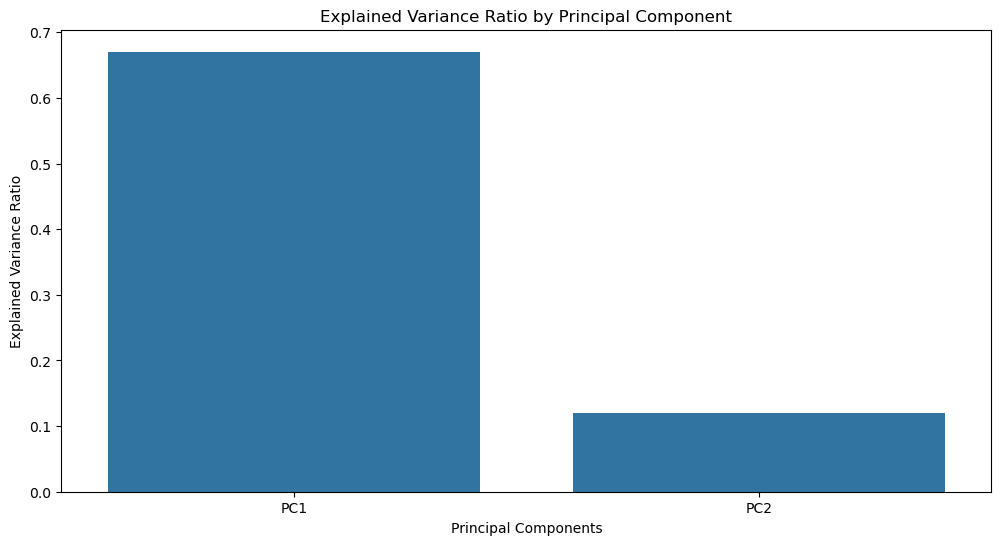

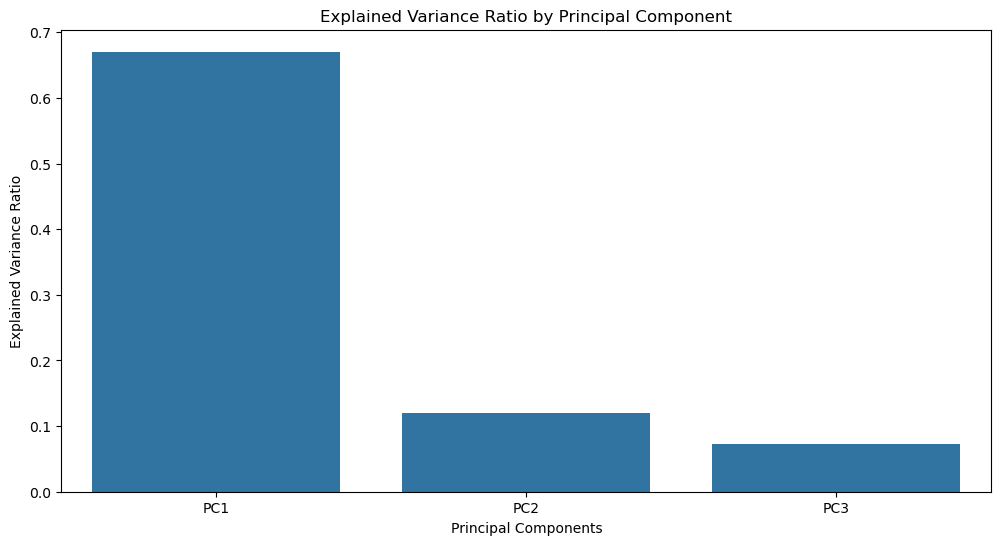

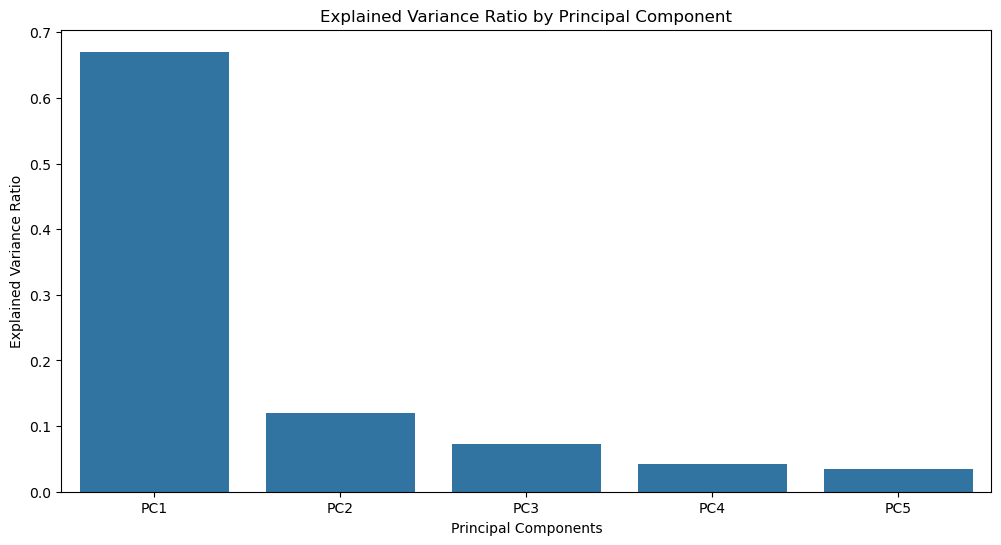

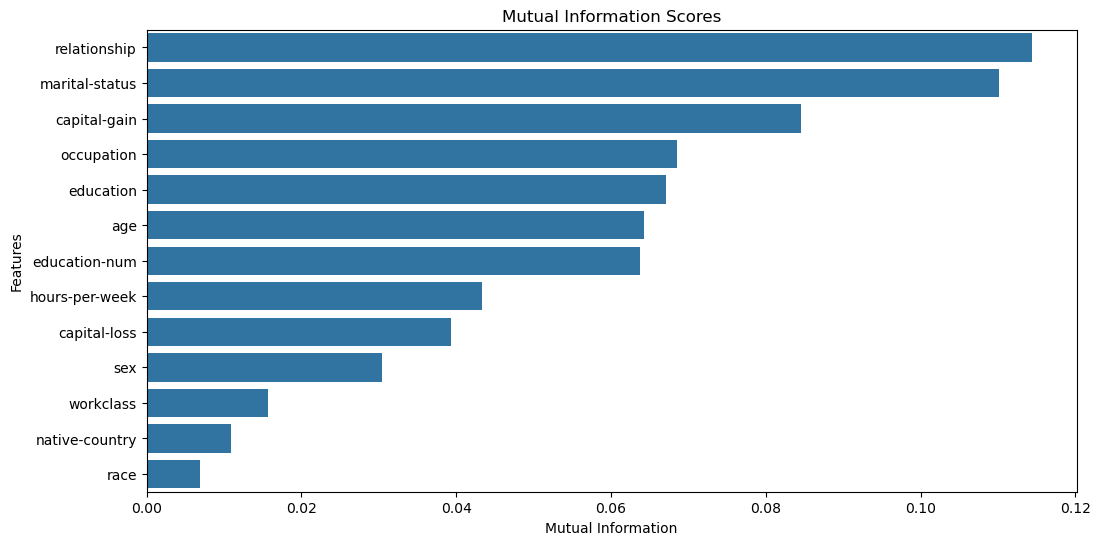

Top features based on mutual information:
 Index(['relationship', 'marital-status', 'capital-gain', 'occupation',
       'education', 'age', 'education-num', 'hours-per-week', 'capital-loss',
       'sex'],
      dtype='object')
Top features based on RFE:
 Index(['age', 'workclass', 'education-num', 'occupation', 'relationship',
       'race', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country'],
      dtype='object')


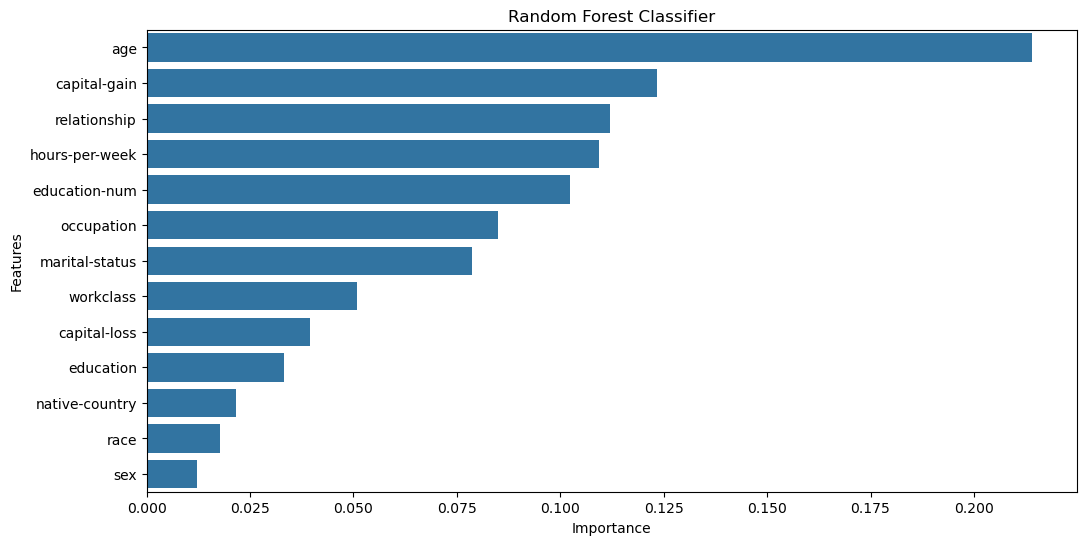

Top features based on feature importance of Random Forest Classifier:
 Index(['age', 'capital-gain', 'relationship', 'hours-per-week',
       'education-num', 'occupation', 'marital-status', 'workclass',
       'capital-loss', 'education'],
      dtype='object')
Final Selected Features for Candidate Algorithms: ['relationship', 'capital-gain', 'occupation', 'age', 'education-num', 'hours-per-week', 'capital-loss', 'marital-status', 'education', 'workclass']


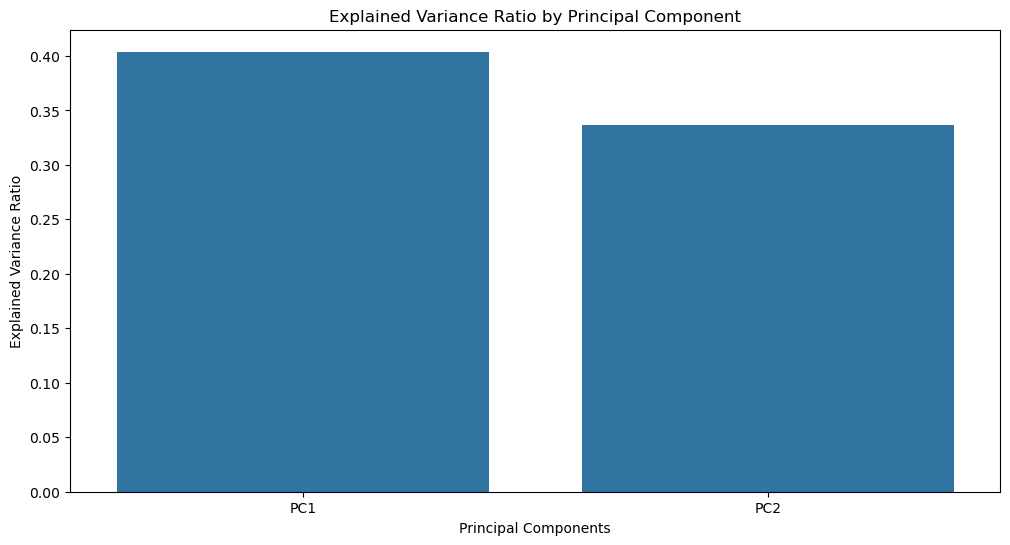

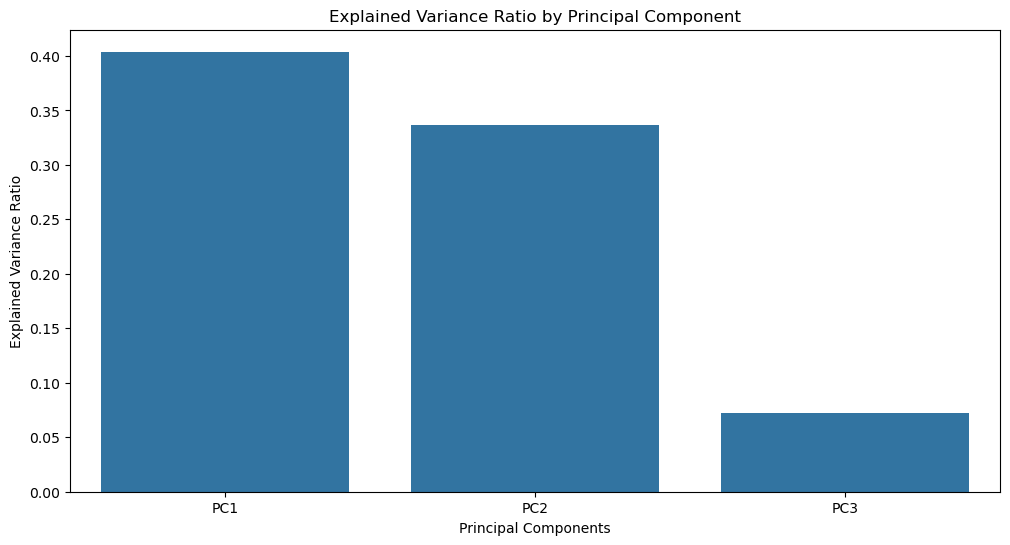

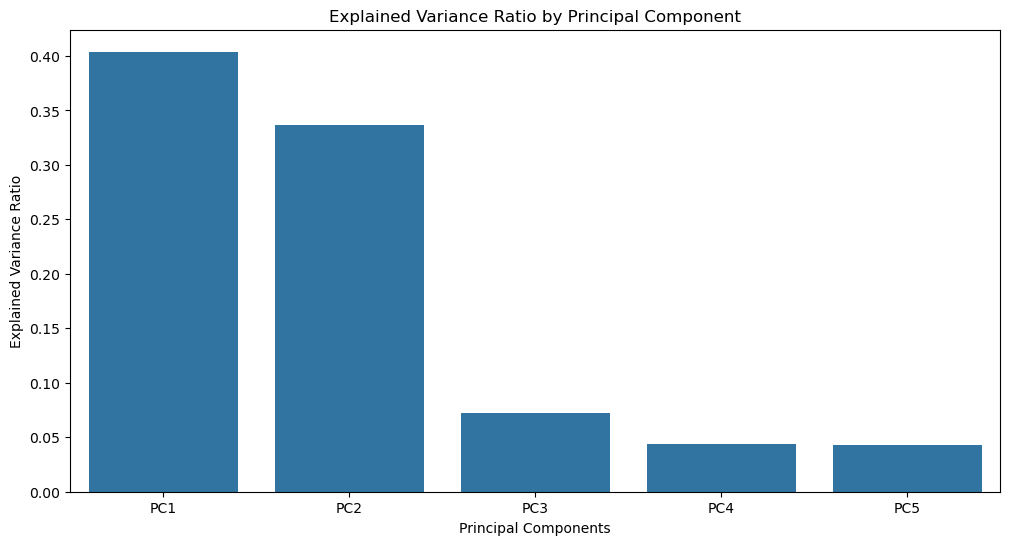

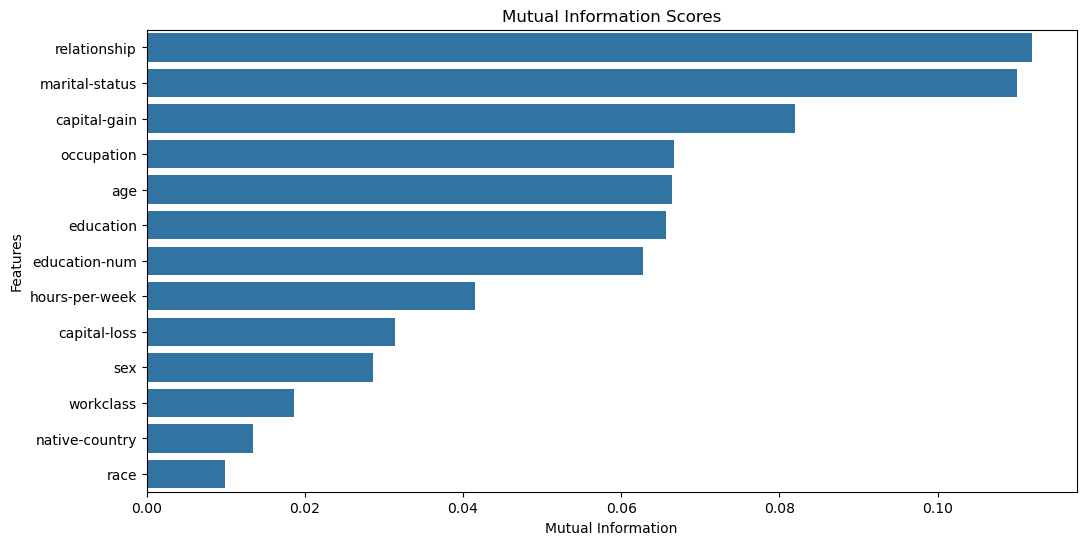

Top features based on mutual information:
 Index(['relationship', 'marital-status', 'capital-gain'], dtype='object')
Top features based on RFE:
 Index(['education-num', 'relationship', 'capital-gain'], dtype='object')


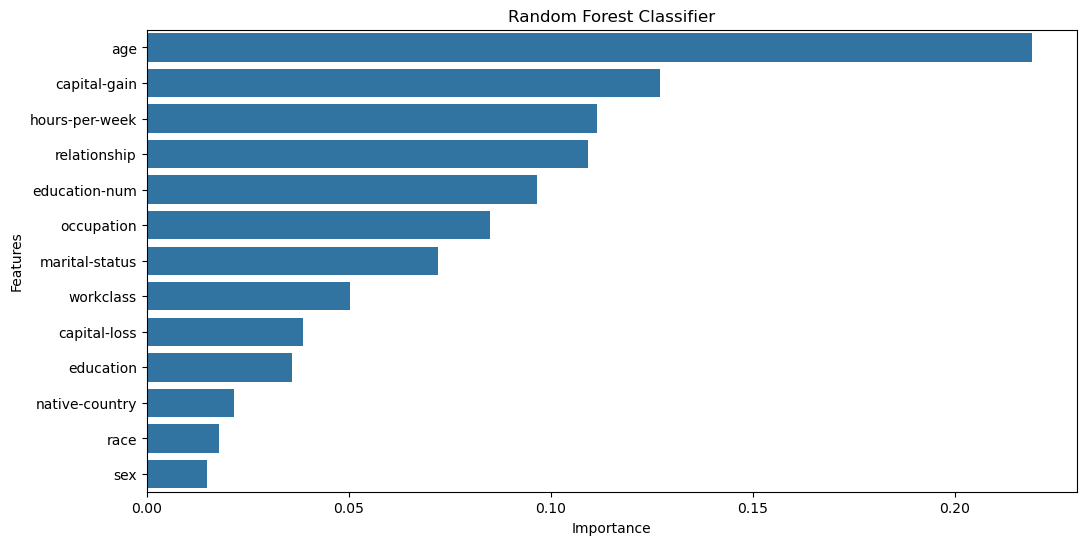

Top features based on feature importance of Random Forest Classifier:
 Index(['age', 'capital-gain', 'hours-per-week'], dtype='object')
Final Selected Features for Candidate Algorithms: ['capital-gain', 'relationship', 'marital-status']


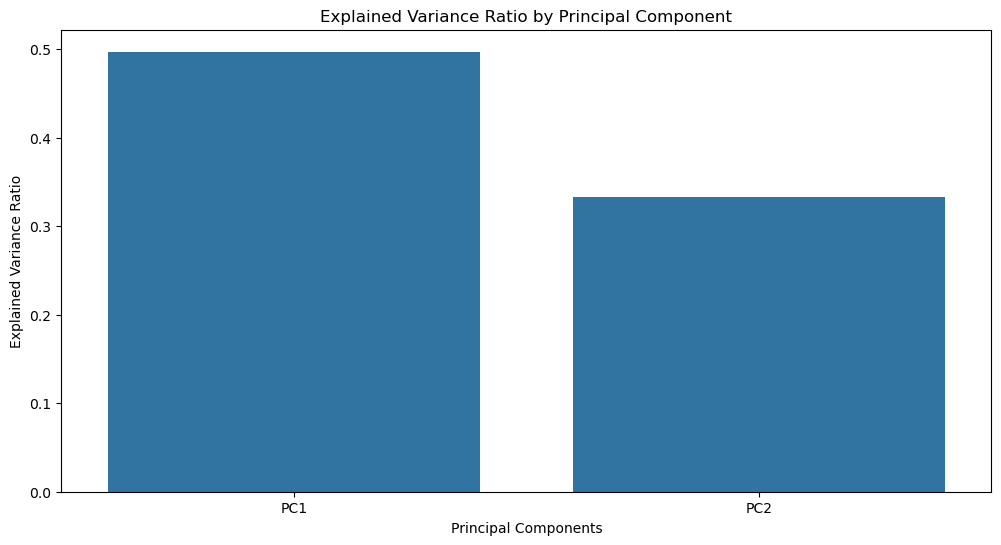

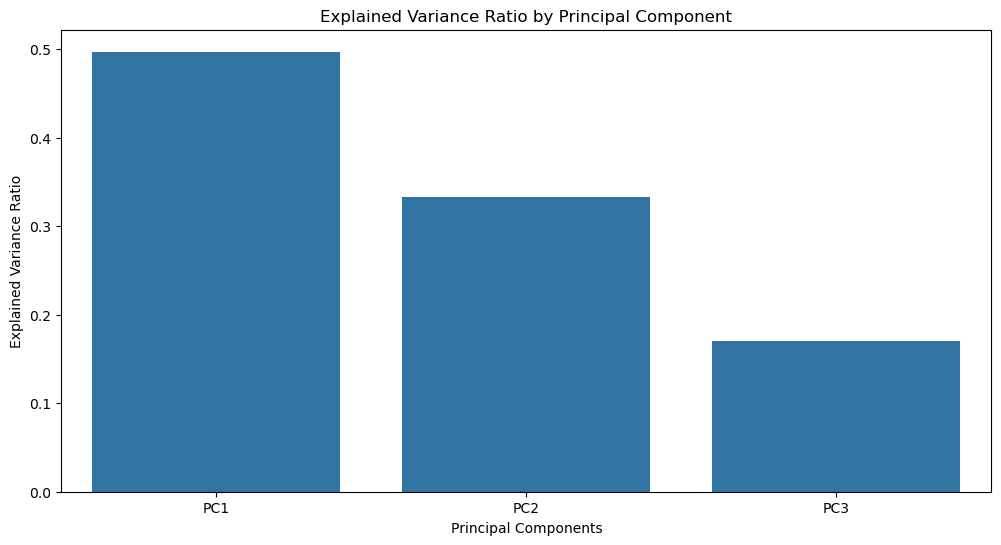

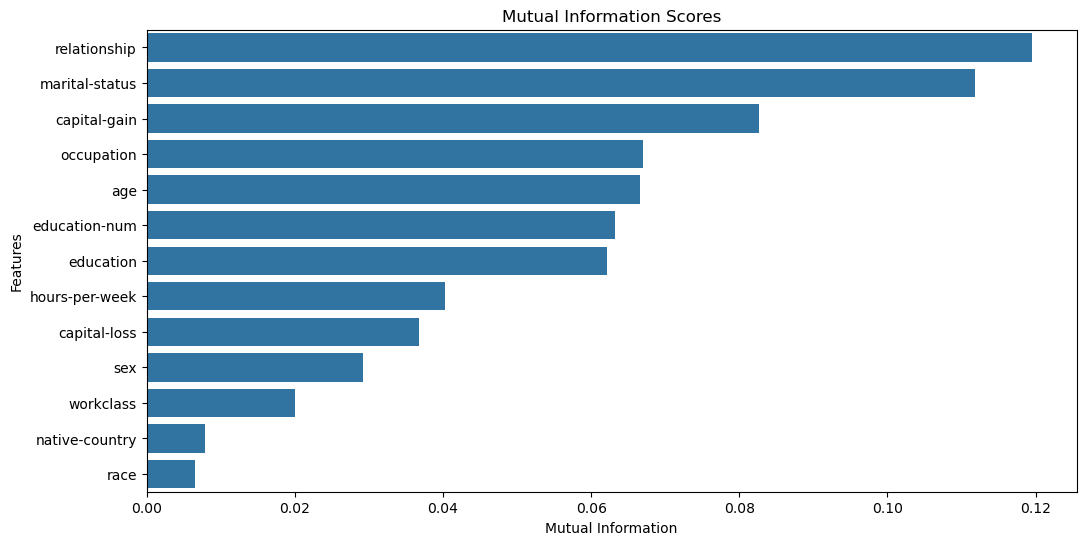

Top features based on mutual information:
 Index(['relationship', 'marital-status', 'capital-gain', 'occupation', 'age',
       'education-num', 'education'],
      dtype='object')
Top features based on RFE:
 Index(['age', 'workclass', 'education-num', 'occupation', 'relationship',
       'capital-gain', 'hours-per-week'],
      dtype='object')


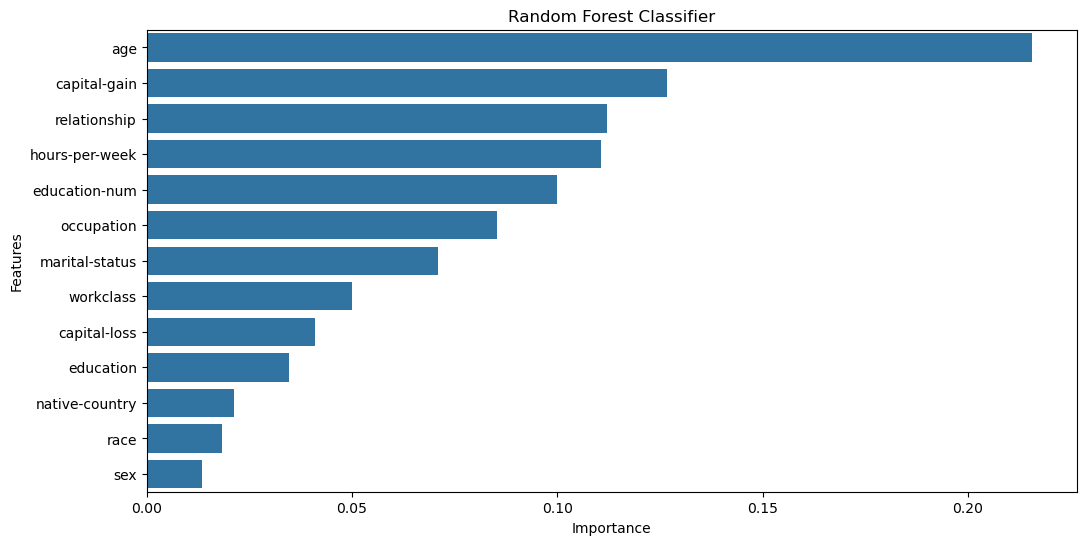

Top features based on feature importance of Random Forest Classifier:
 Index(['age', 'capital-gain', 'relationship', 'hours-per-week',
       'education-num', 'occupation', 'marital-status'],
      dtype='object')
Final Selected Features for Candidate Algorithms: ['relationship', 'capital-gain', 'occupation', 'age', 'education-num', 'marital-status', 'hours-per-week']


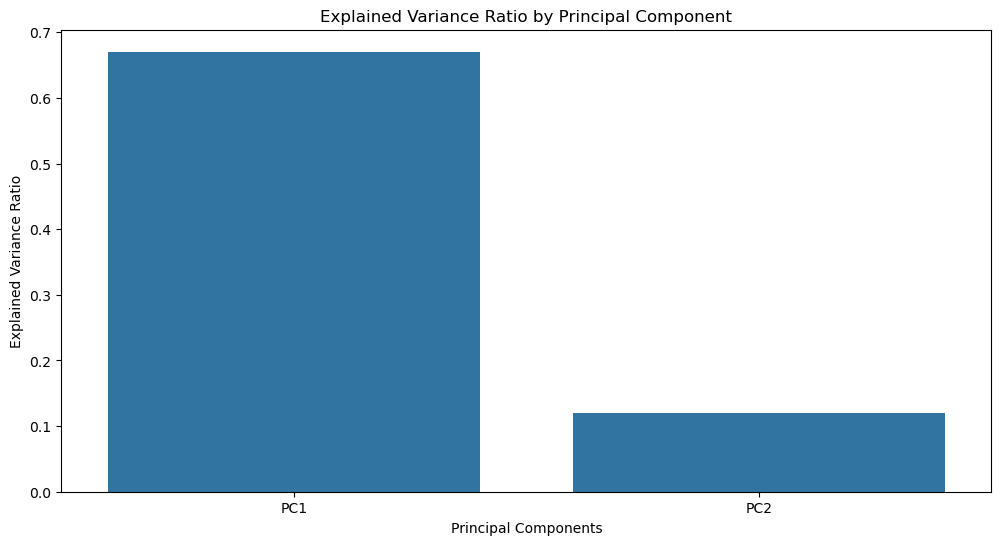

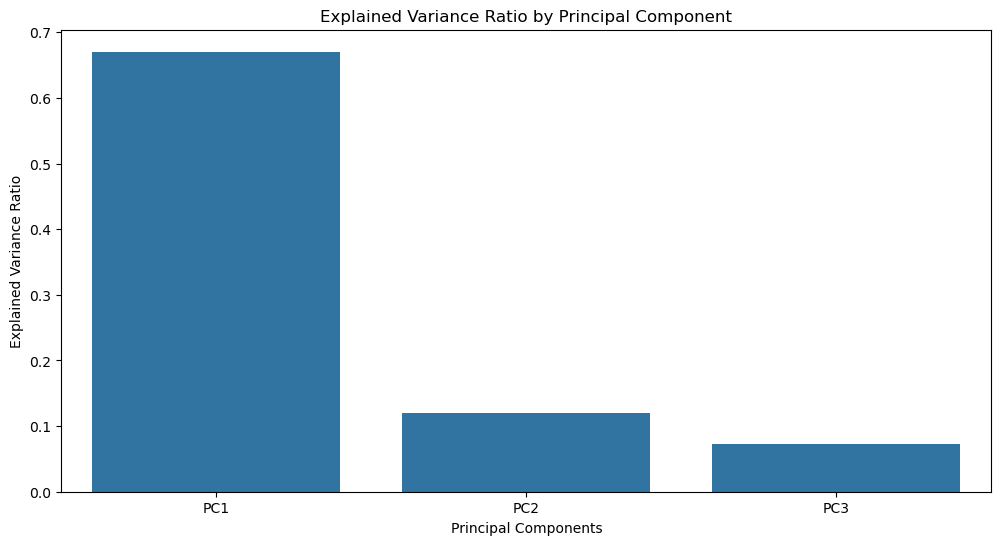

,Algorithm,Features,PCA_Components,Test_Size,CV,Accuracy,Best_Params,Classification_Report
0,XGBoost,3,2,0.2,3,0.805620,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",precision recall f1-score ...
1,Self-Training,3,2,0.2,3,0.808383,"{'base_estimator__max_depth': 7, 'base_estimat...",precision recall f1-score ...
2,K-Means,3,2,0.2,3,0.637494,{'n_clusters': 2},precision recall f1-score ...
3,XGBoost,3,2,0.2,5,0.805620,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",precision recall f1-score ...
4,Self-Training,3,2,0.2,5,0.808383,"{'base_estimator__max_depth': 7, 'base_estimat...",precision recall f1-score ...


In [56]:
def run_workflow():
    results = []
    
    # Variables for SVM
    svm_feature_nums = [3, 7]
    svm_pca_components = [2, 3]
    svm_test_sizes = [0.2]
    svm_cv_values = [5]

    # Variables for other algorithms
    feature_nums = [3, 7, 10]
    pca_components = [2, 3, 5]
    test_sizes = [0.2, 0.3]
    cv_values = [3, 5, 7]

    # XGBoost and Decision Trees Loop
    for feature_num in feature_nums:
        X_final = init_feature_selection(X, y, feature_num)
        
        for n_components in pca_components:
            X_pca, n_components_local = apply_pca(X_final, n_components)
            
            for test_size in test_sizes:
                X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=42)
                
                for cv in cv_values:
                    # XGBoost
                    xgb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
                    xgb_accuracy, xgb_report, xgb_params = evaluate_model(X_train, X_test, y_train, y_test, XGBClassifier(), xgb_param_grid, cv)
                    results.append(['XGBoost', feature_num, n_components_local, test_size, cv, xgb_accuracy, xgb_params, xgb_report])
                    
                    # Self-Training with Decision Trees
                    dt_param_grid = {
                        'base_estimator__max_depth': [3, 5, 7],
                        'base_estimator__min_samples_split': [2, 5, 10],
                        'threshold': [0.5, 0.6, 0.7]
                    }                   
                    rng = np.random.default_rng(42)
                    mask = rng.random(len(y_train)) < 0.5 # Mask 50% of the training labels
                    y_train_semi = y_train.copy()
                    y_train_semi[mask] = -1  # -1 to indicate unlabeled samples
                    dt_accuracy, dt_report, dt_params = evaluate_model(X_train, X_test, y_train_semi, y_test, SelfTrainingClassifier(DecisionTreeClassifier()), dt_param_grid, cv)
                    results.append(['Self-Training', feature_num, n_components_local, test_size, cv, dt_accuracy, dt_params, dt_report])
                    
                    # K-Means, for testing an unsupervised algorithm
                    kmeans_param_grid = {'n_clusters': [2, 3, 4, 5, 6]}
                    kmeans_accuracy, kmeans_report, kmeans_params = evaluate_model(X_train, X_test, y_train, y_test, KMeans(random_state=42), kmeans_param_grid, cv)
                    results.append(['K-Means', feature_num, n_components_local, test_size, cv, kmeans_accuracy, kmeans_params, kmeans_report])

    # SVM Loop, run separately to reduce options as it is computationally expensive
    for feature_num in svm_feature_nums:
        X_final = init_feature_selection(X, y, feature_num)
        
        for n_components in svm_pca_components:
            X_pca, n_components_local = apply_pca(X_final, n_components)
            
            for test_size in svm_test_sizes:
                X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=42)
                
                for cv in svm_cv_values:
                    # SVM
                    svm_param_grid = {'C': [0.1, 1, 10]}
                    svm_accuracy, svm_report, svm_params = evaluate_model(X_train, X_test, y_train, y_test, SVC(), svm_param_grid, cv)
                    results.append(['SVM', feature_num, n_components_local, test_size, cv, svm_accuracy, svm_params, svm_report])

    results_df = pd.DataFrame(results, columns=['Algorithm', 'Features', 'PCA_Components', 'Test_Size', 'CV', 'Accuracy', 'Best_Params', 'Classification_Report'])
    
    # Save results to csv file
    with open('results.csv', 'w') as f:
        results_df.to_csv(f, index=False)

    return results_df

# Run
results_df = run_workflow()
results_df.head()

## Accuracy Results

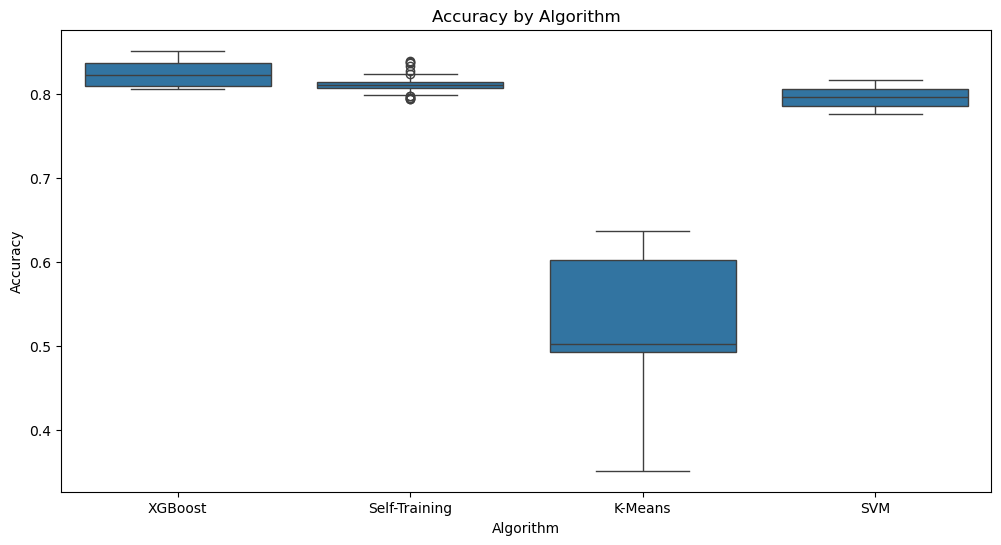

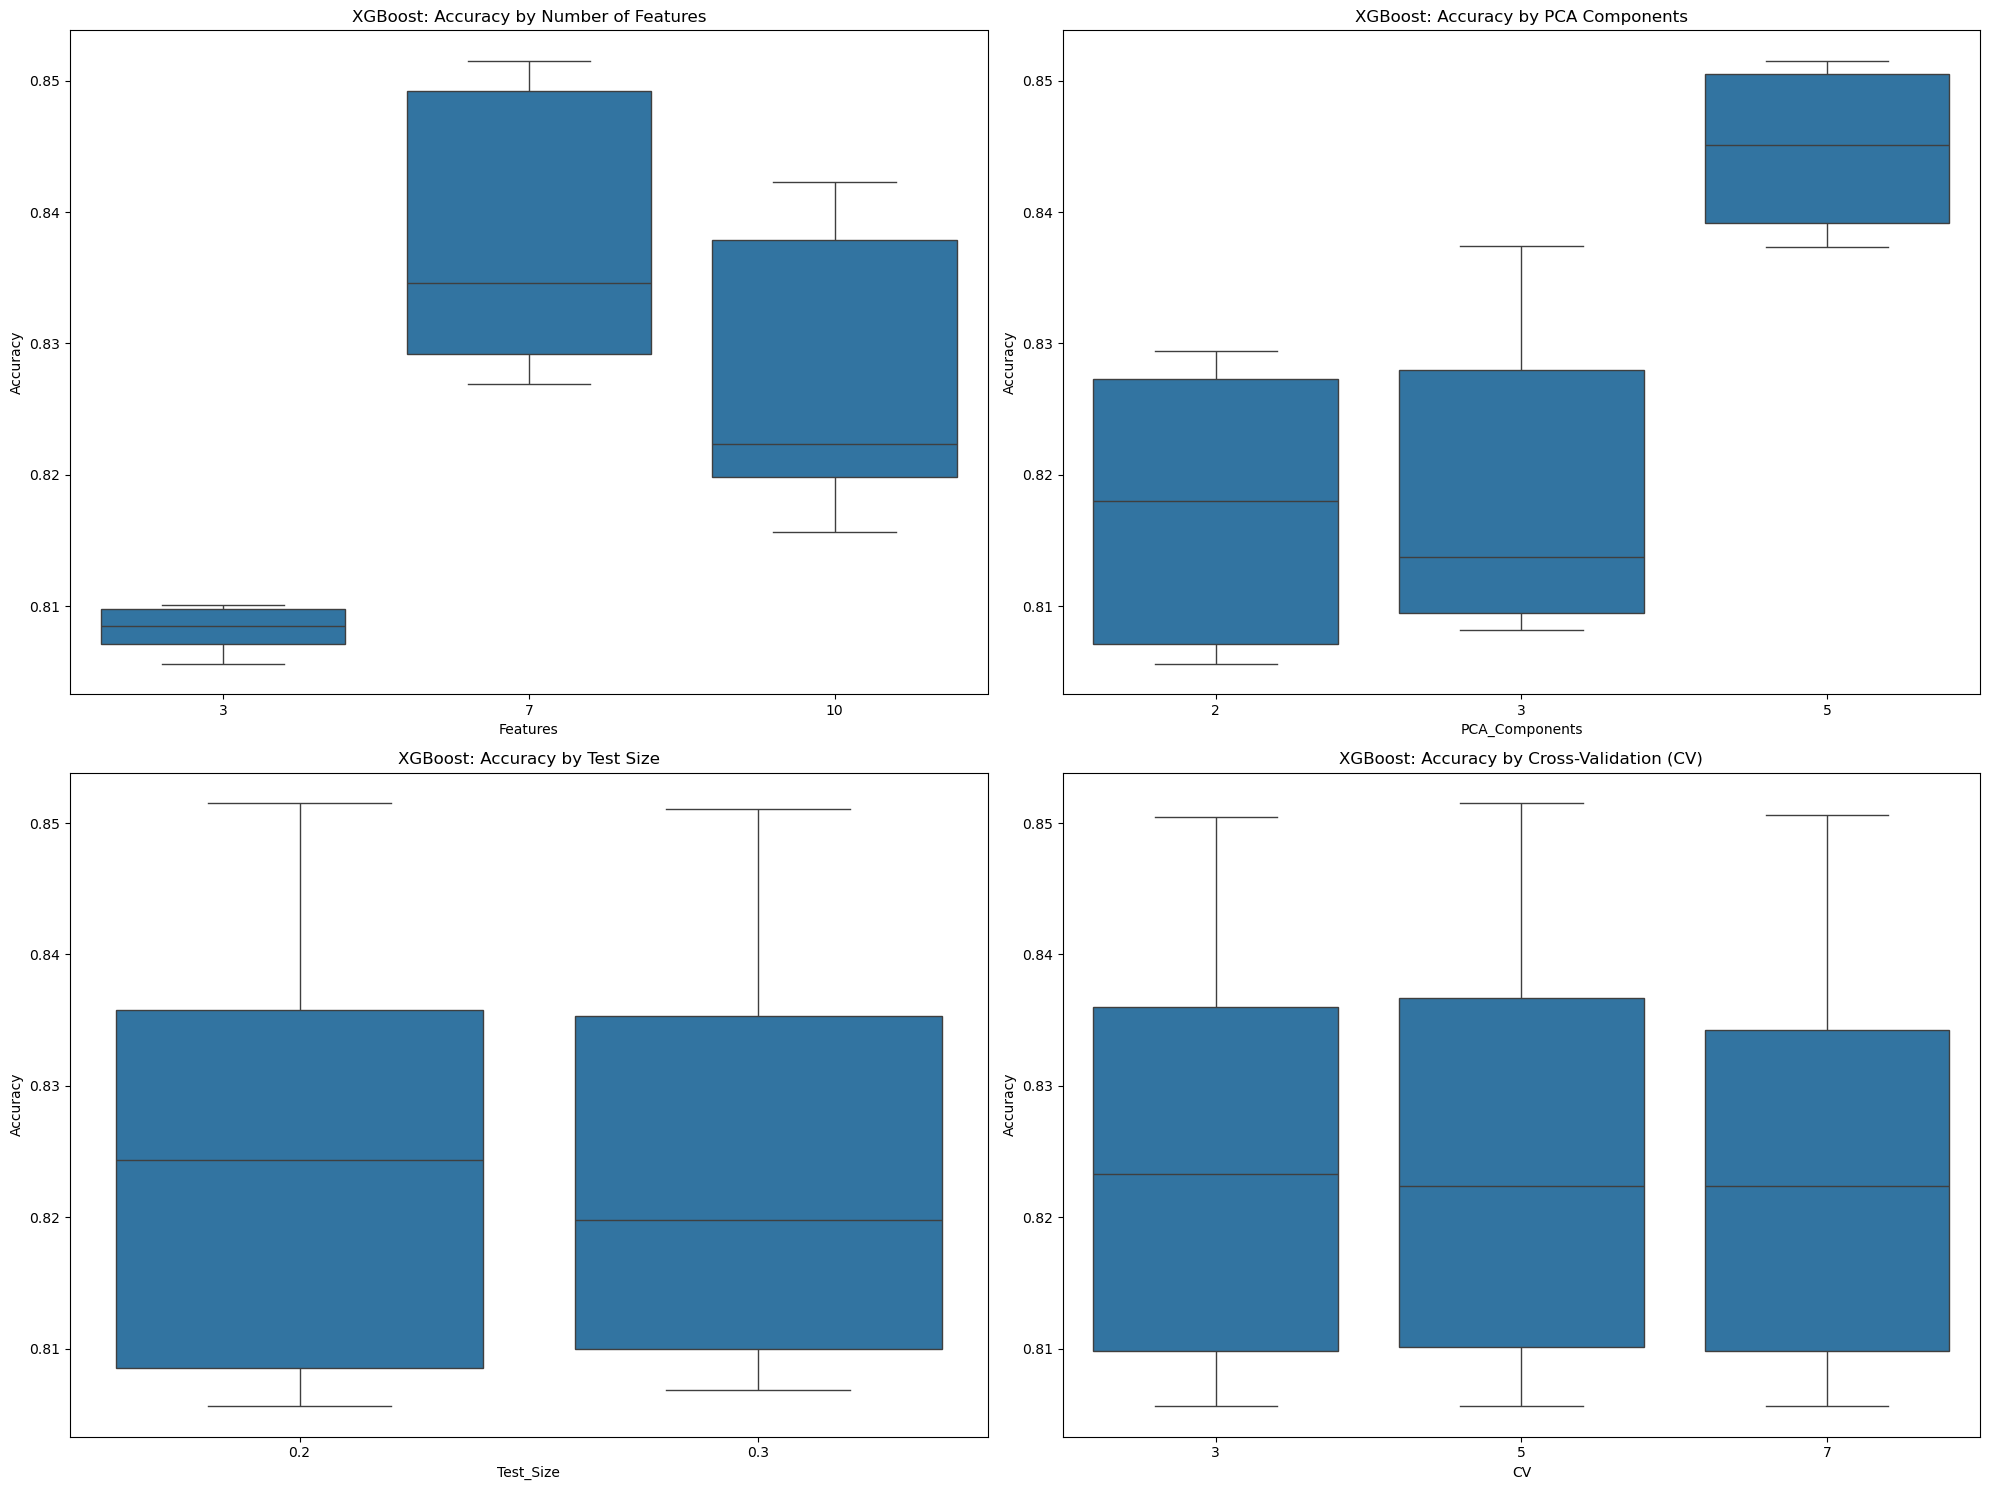

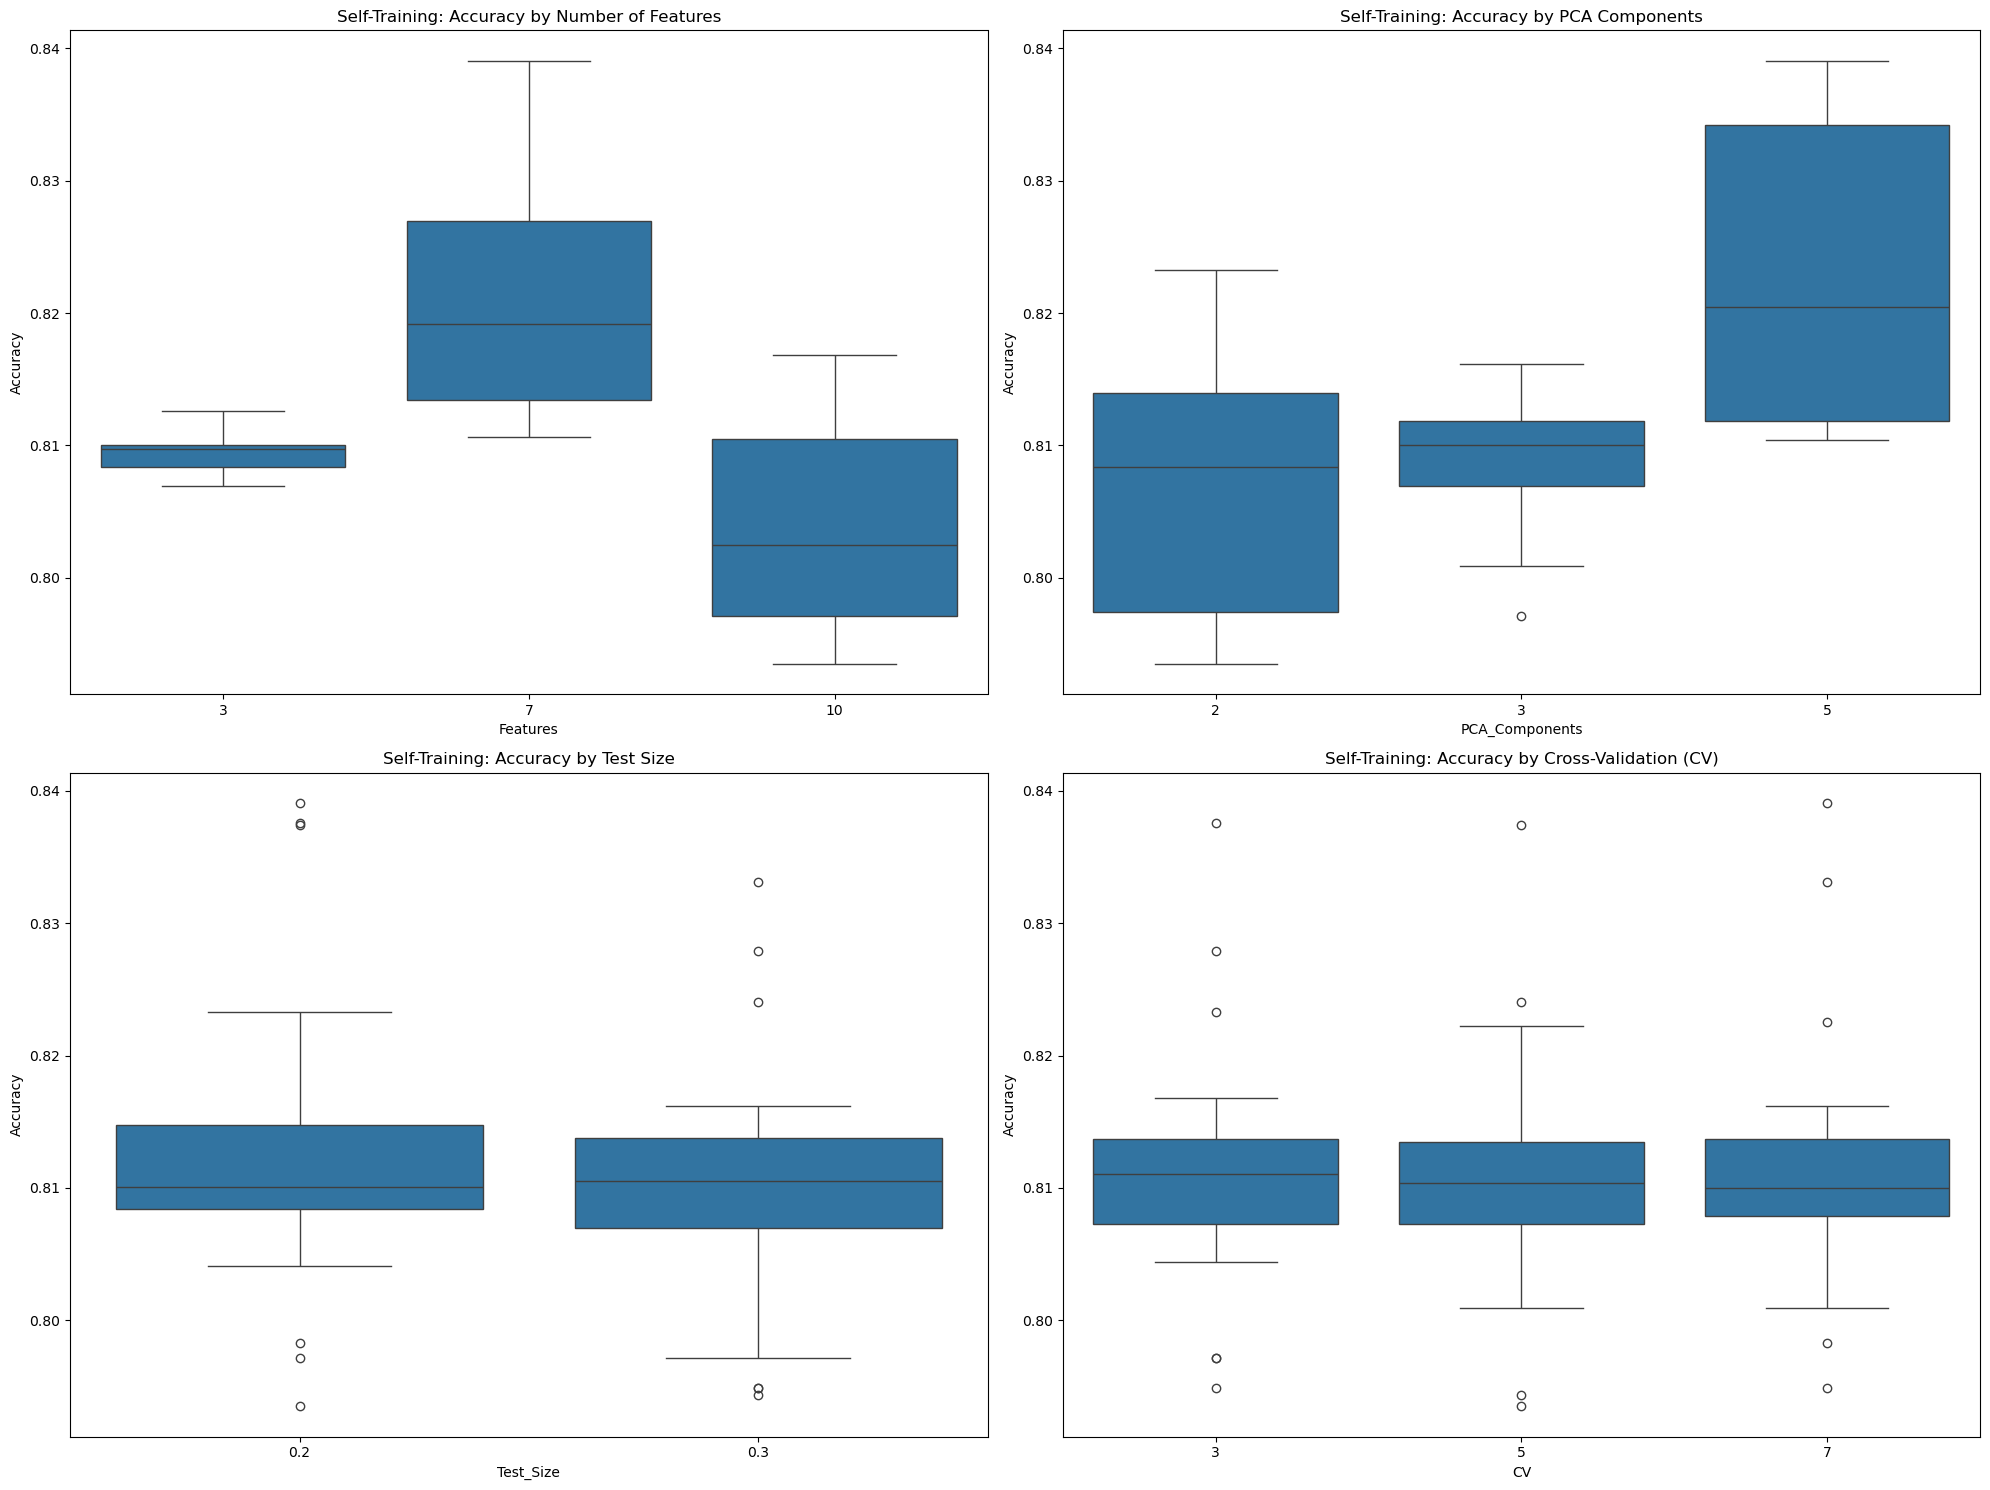

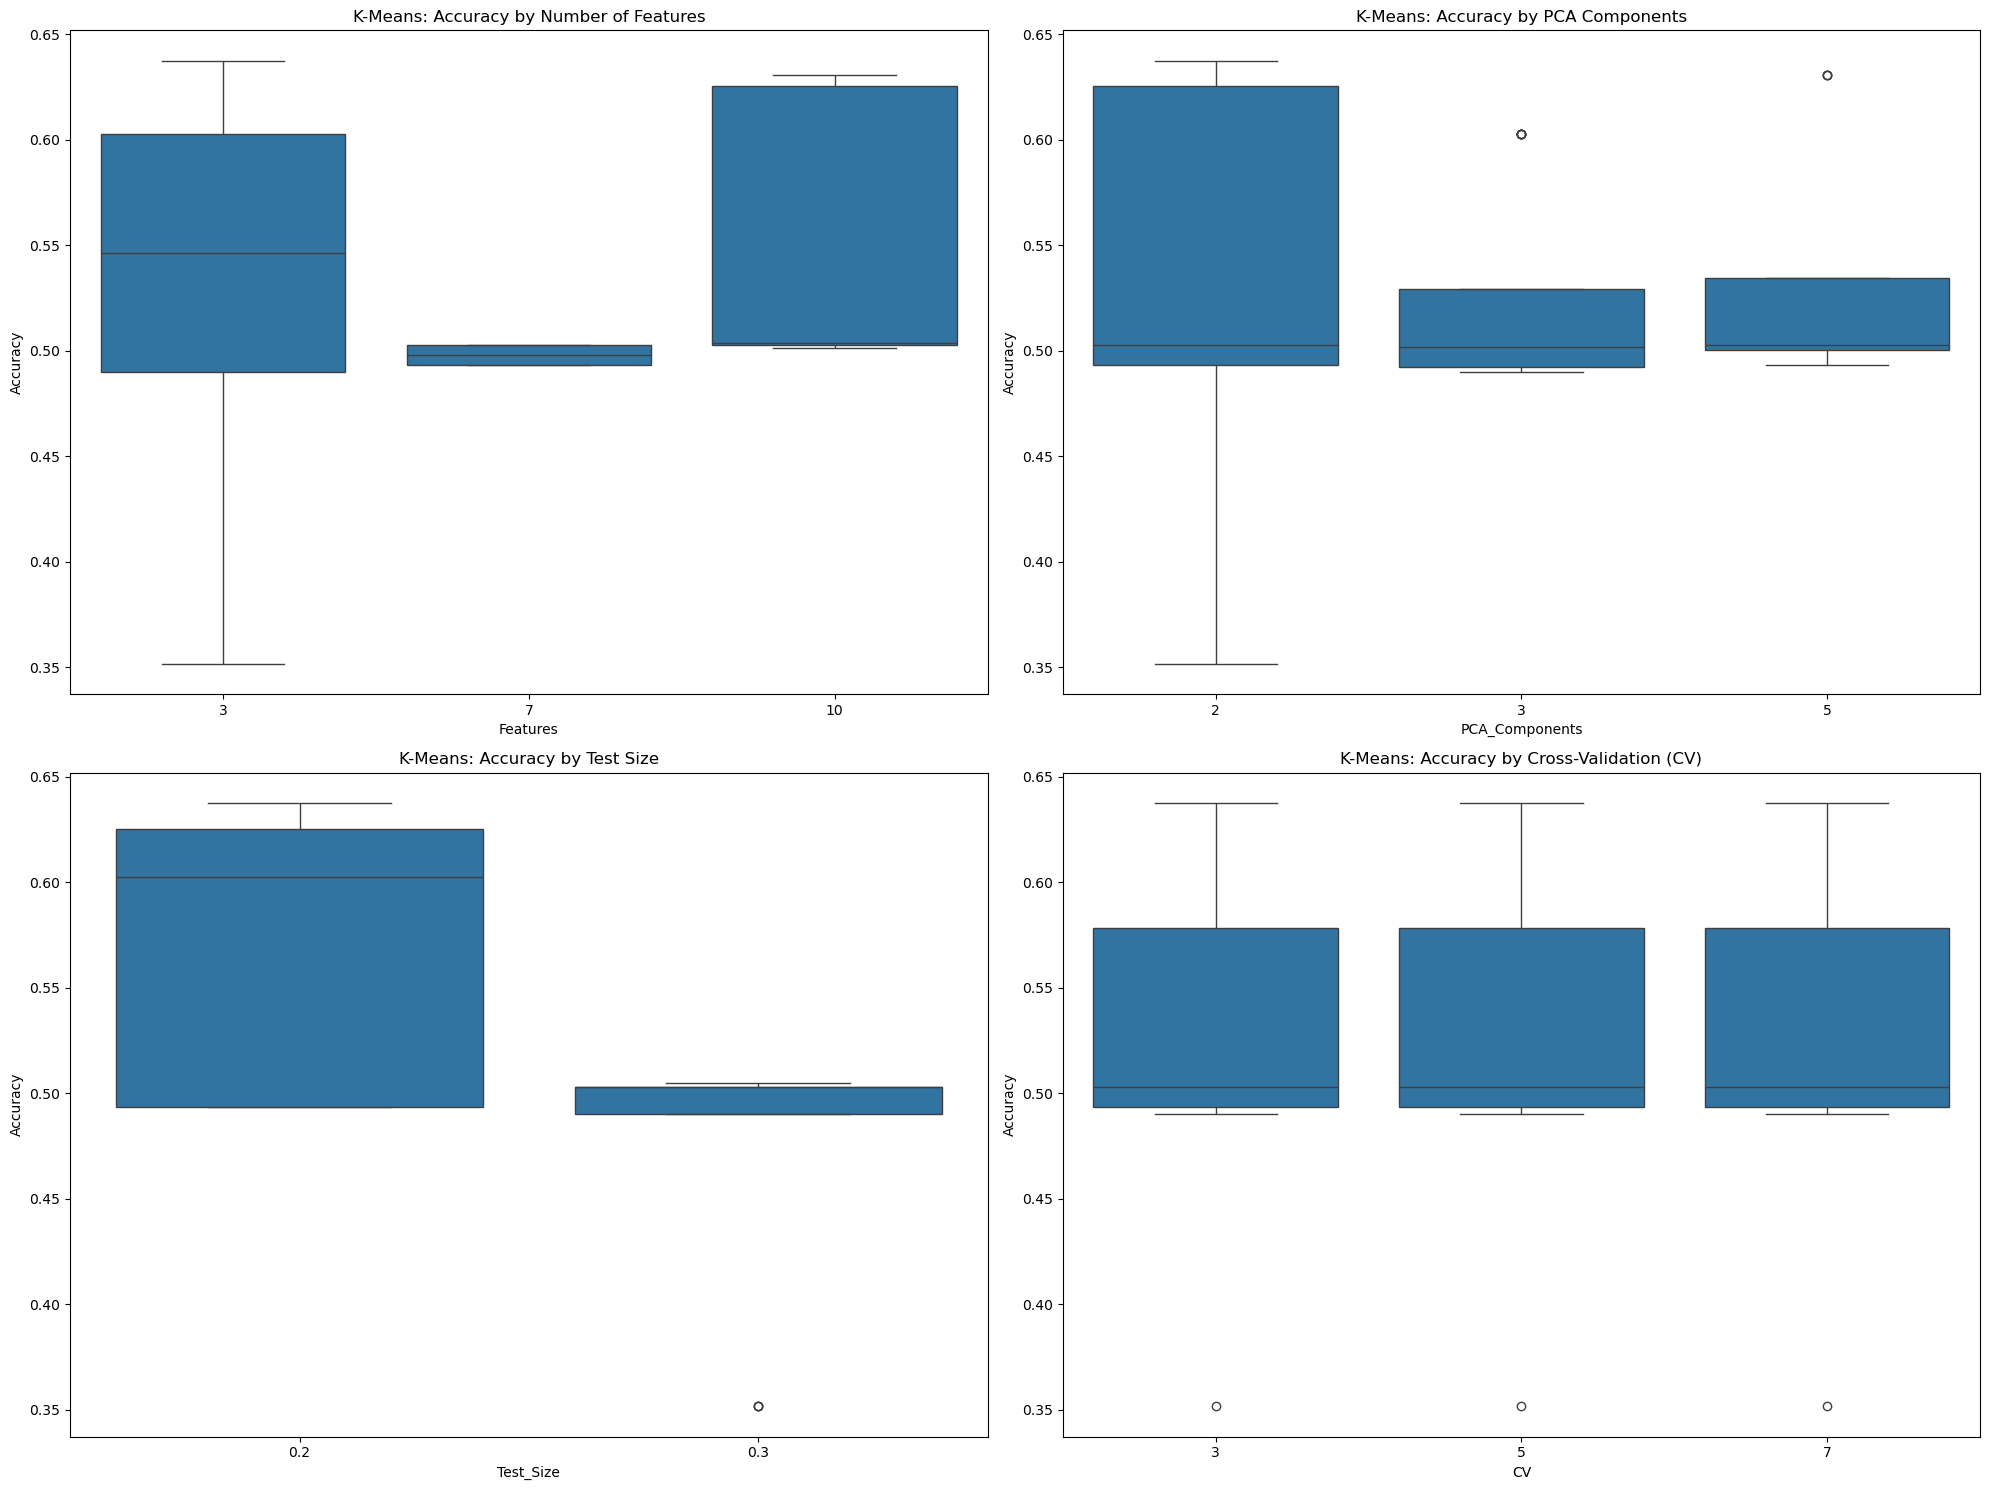

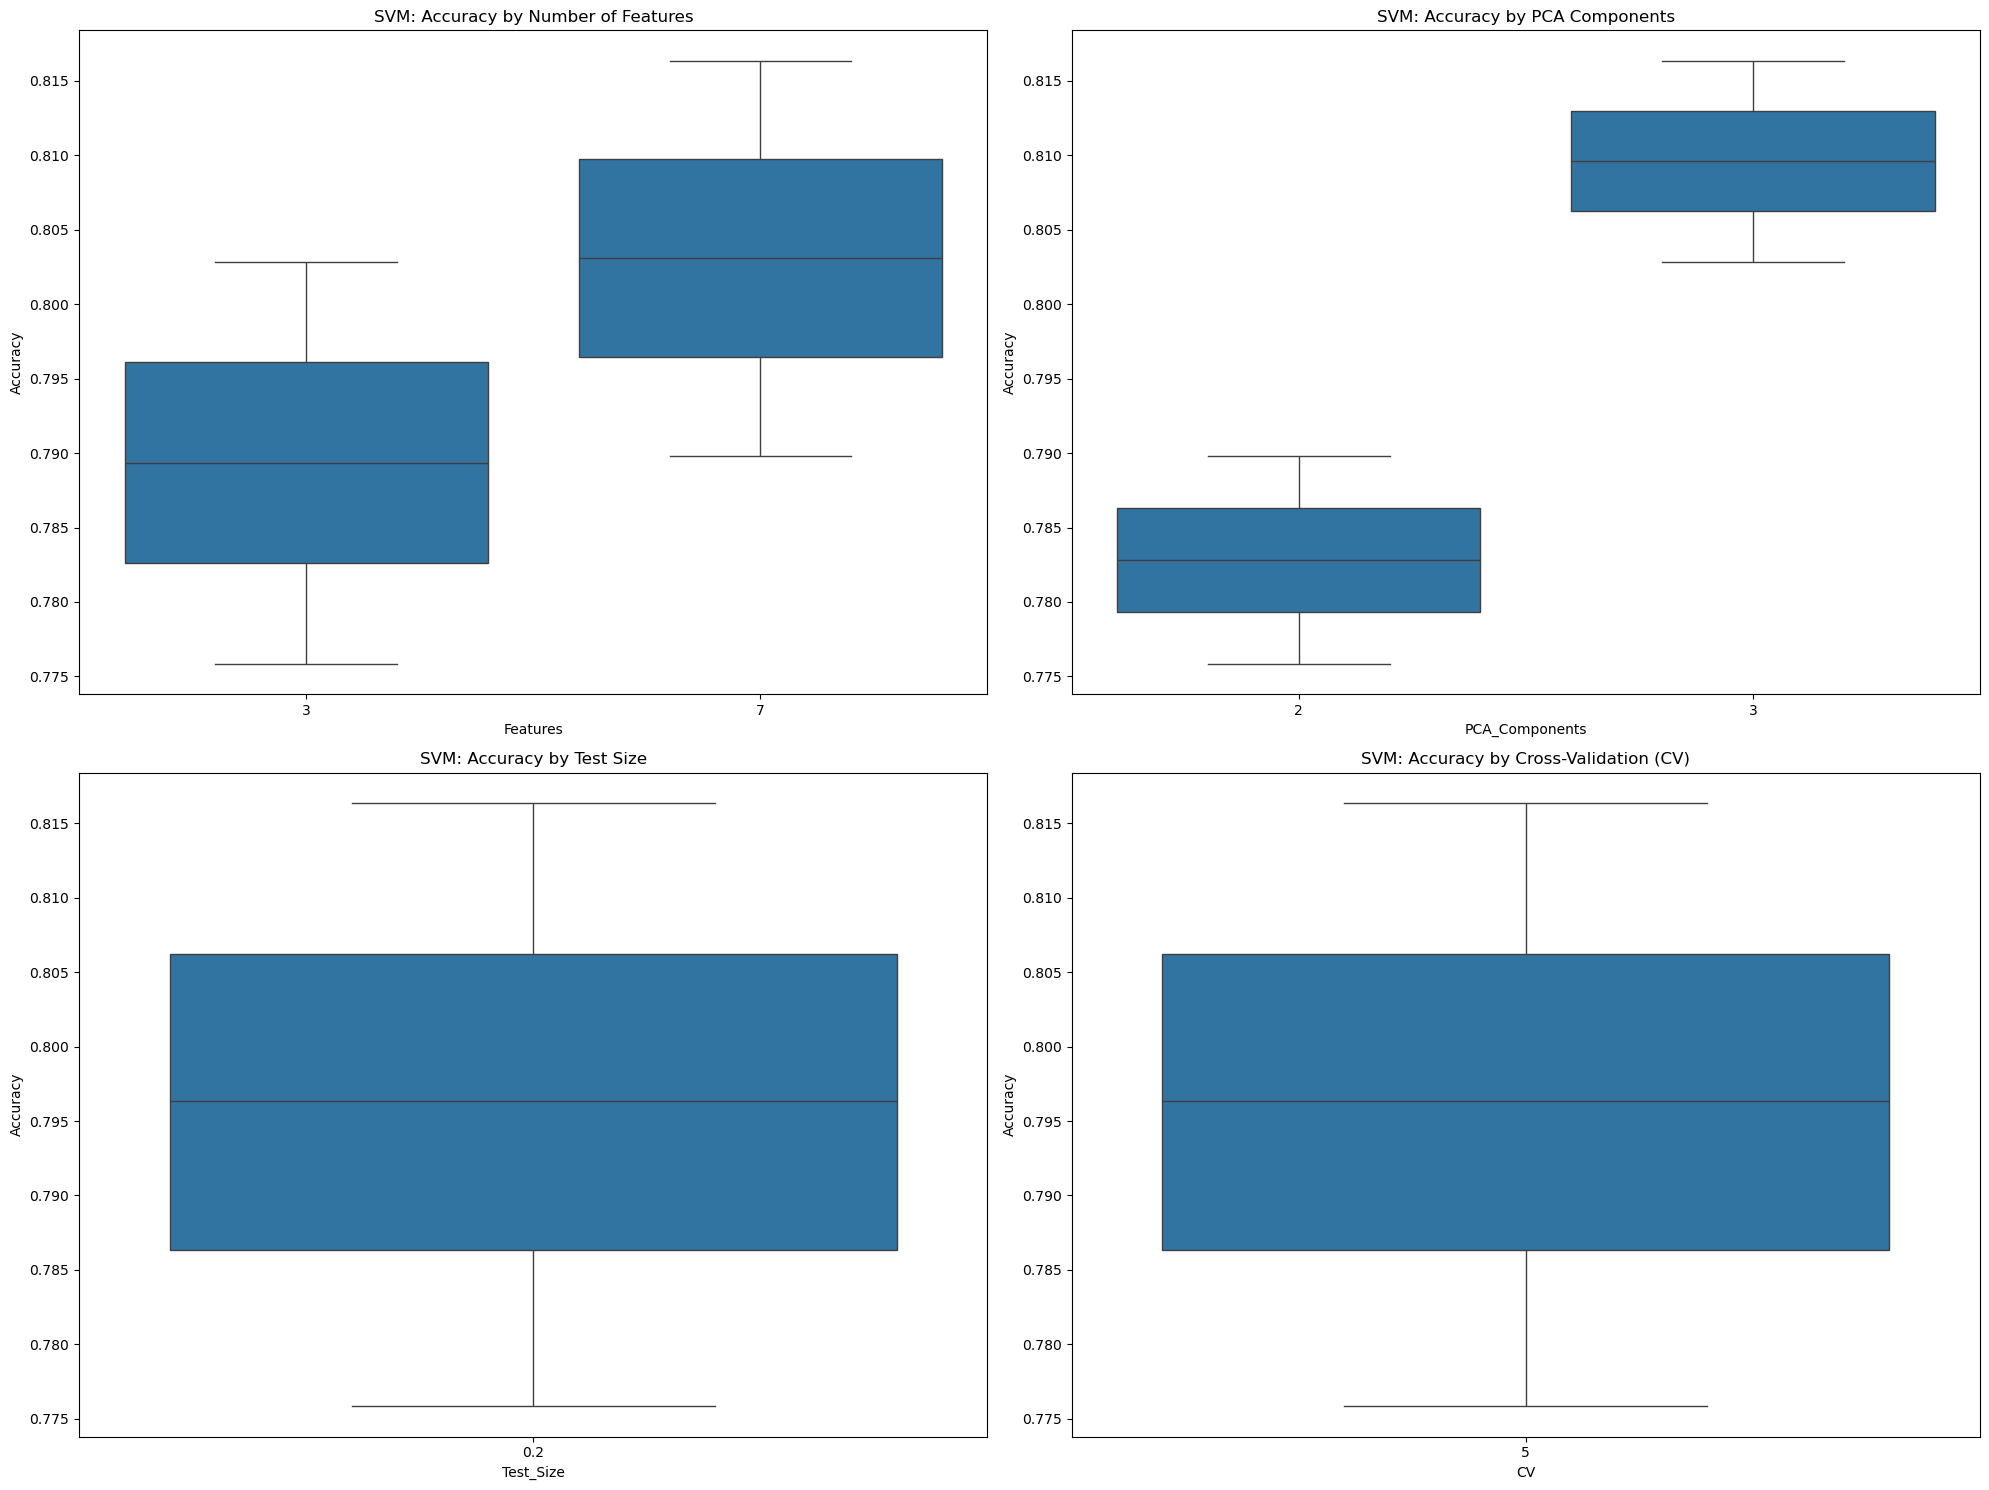

In [57]:
def plot_algorithm_performance(results_df):
    # Boxplot of Accuracy by Algorithm
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Algorithm', y='Accuracy', data=results_df)
    plt.title('Accuracy by Algorithm')
    plt.show()

    algorithms = results_df['Algorithm'].unique()

    for algorithm in algorithms:
        plt.figure(figsize=(20, 15))

        # Plot for Number of Features
        plt.subplot(2, 2, 1)
        sns.boxplot(x='Features', y='Accuracy', data=results_df[results_df['Algorithm'] == algorithm])
        plt.title(f'{algorithm}: Accuracy by Number of Features')

        # Plot for PCA Components
        plt.subplot(2, 2, 2)
        sns.boxplot(x='PCA_Components', y='Accuracy', data=results_df[results_df['Algorithm'] == algorithm])
        plt.title(f'{algorithm}: Accuracy by PCA Components')

        # Plot for Test Sizes
        plt.subplot(2, 2, 3)
        sns.boxplot(x='Test_Size', y='Accuracy', data=results_df[results_df['Algorithm'] == algorithm])
        plt.title(f'{algorithm}: Accuracy by Test Size')

        # Plot for Cross-Validation Values
        plt.subplot(2, 2, 4)
        sns.boxplot(x='CV', y='Accuracy', data=results_df[results_df['Algorithm'] == algorithm])
        plt.title(f'{algorithm}: Accuracy by Cross-Validation (CV)')

        plt.tight_layout()
        plt.show()

#results_df = pd.read_csv('/mnt/data/results.csv')

# Plot the performance of each algorithm
plot_algorithm_performance(results_df)

## Run Optimised Experiment

Run a final experiment based on previous results, with an aim to improve the macro average f-1 score of XGBoost.

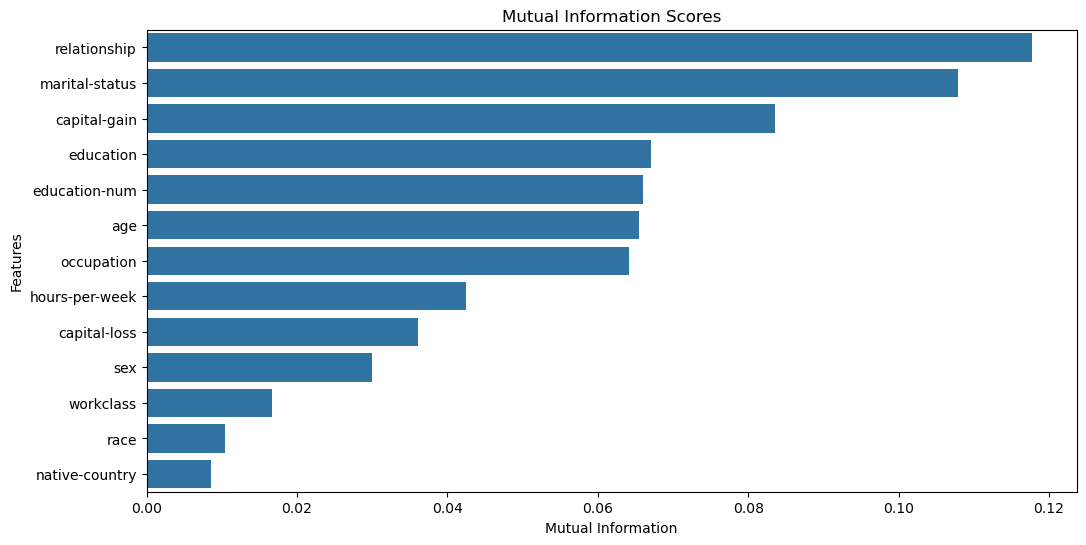

Top features based on mutual information:
 Index(['relationship', 'marital-status', 'capital-gain', 'education',
       'education-num', 'age', 'occupation'],
      dtype='object')
Top features based on RFE:
 Index(['age', 'workclass', 'education-num', 'occupation', 'relationship',
       'capital-gain', 'hours-per-week'],
      dtype='object')


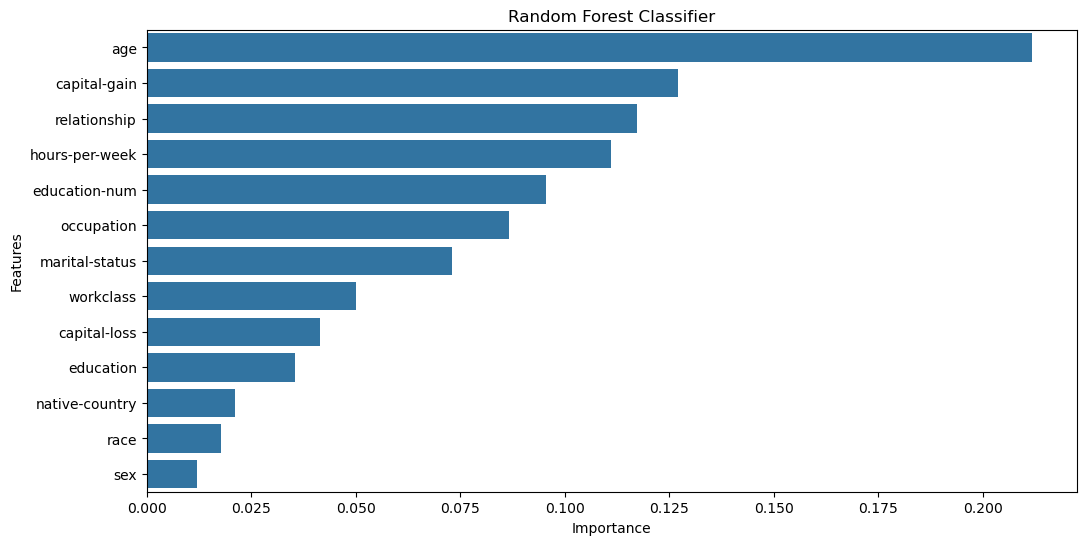

Top features based on feature importance of Random Forest Classifier:
 Index(['age', 'capital-gain', 'relationship', 'hours-per-week',
       'education-num', 'occupation', 'marital-status'],
      dtype='object')
Final Selected Features for Candidate Algorithms: ['relationship', 'capital-gain', 'education-num', 'age', 'occupation', 'marital-status', 'hours-per-week']


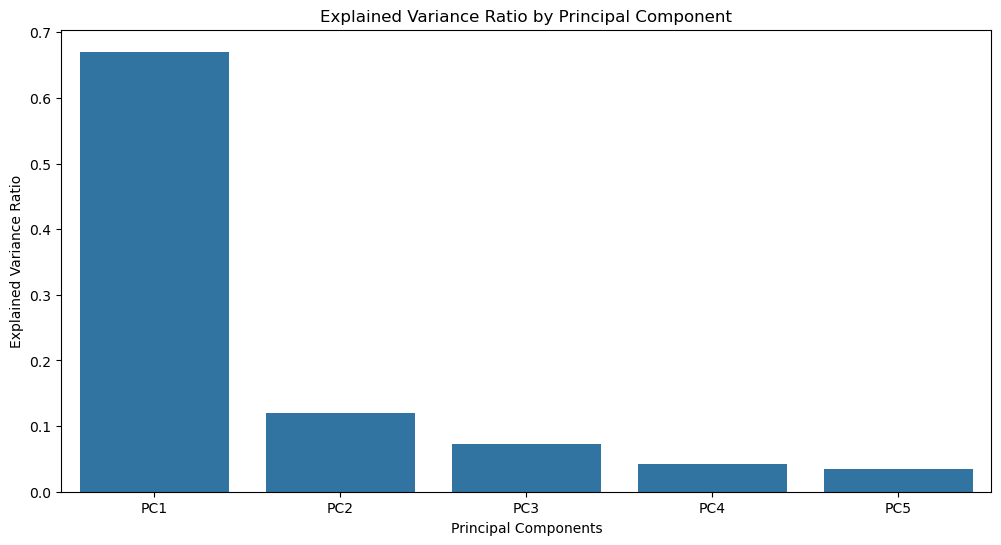

KeyboardInterrupt: 

In [64]:
def optimise_experiment(X, y):
    # Define the optimal hyperparameters and variables for each algorithm
    optimal_params = {
        'XGBoost': {
            'features': 7,
            'pca_components': 5,
            'test_size': 0.2,
            'cv': 5,
            'param_grid': {
                'n_estimators': [300],
                'learning_rate': [0.3],
                'max_depth': [3],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
        },
        # 'SelfTraining': {
        #     'features': 7,
        #     'pca_components': 5,
        #     'test_size': 0.2,
        #     'cv': 3,
        #     'param_grid': {
        #         'base_estimator__max_depth': [5, 7, 9],
        #         'base_estimator__min_samples_split': [2, 5, 10],
        #         'threshold': [0.5, 0.6, 0.7],
        #         'base_estimator__min_samples_leaf': [1, 2, 4],
        #         'base_estimator__criterion': ['gini', 'entropy']
        #     }
        # },
        # 'SVM': {
        #     'features': 7,
        #     'pca_components': 3,
        #     'test_size': 0.2,
        #     'cv': 5,
        #     'param_grid': {
        #         'C': [1, 10, 100],
        #         'kernel': ['linear', 'rbf', 'poly'],
        #         'gamma': ['scale', 'auto'],
        #         'degree': [3, 4, 5],
        #         'coef0': [0.0, 0.1, 0.2]
        #     }
        # },
        # 'KMeans': {
        #     'features': 3,
        #     'pca_components': 2,
        #     'test_size': 0.2,
        #     'cv': 3,
        #     'param_grid': {
        #         'n_clusters': [2, 3, 4],
        #         'init': ['k-means++', 'random'],
        #         'n_init': [10, 20],
        #         'max_iter': [300, 400, 500]
        #     }
        # }
    }

    results = []

    for algo, params in optimal_params.items():
        # Apply feature selection
        X_selected = init_feature_selection(X, y, params['features'])

        # Apply PCA
        X_pca, n_components_local = apply_pca(X_selected, params['pca_components'])

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=params['test_size'], random_state=42)

        # Initialize the model based on the algorithm
        if algo == 'XGBoost':
            model = XGBClassifier()
        elif algo == 'SelfTraining':
            base_estimator = DecisionTreeClassifier()
            model = SelfTrainingClassifier(base_estimator, threshold=params['param_grid']['threshold'][0])
            # Mask 50% of the training labels for semi-supervised learning
            rng = np.random.default_rng(42)
            mask = rng.random(len(y_train)) < 0.5
            y_train[mask] = -1
        elif algo == 'SVM':
            model = SVC()
        elif algo == 'KMeans':
            model = KMeans()

        # Evaluate the model
        accuracy, report, best_params = evaluate_model(X_train, X_test, y_train, y_test, model, params['param_grid'], cv=params['cv'])
        
        # Store the results
        results.append({
            'Algorithm': algo,
            'Features': params['features'],
            'PCA': params['pca_components'],
            'Test_Size': params['test_size'],
            'CV': params['cv'],
            'Accuracy': accuracy,
            'Best_Params': best_params,
            'Report': report
        })

    # Convert results to DataFrame and save as CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv('optimized_results.csv', index=False)
    return results_df

# Call the function
optimised_results_df = optimise_experiment(X, y)
optimised_results_df.head()